## **Conversational Memory**

In [2]:
import inspect

from getpass import getpass
from langchain import OpenAI
from langchain.chains import LLMChain, ConversationChain
from langchain.chains.conversation.memory import (ConversationBufferMemory, 
                                                  ConversationSummaryMemory, 
                                                  ConversationBufferWindowMemory,
                                                  ConversationKGMemory)
from langchain.callbacks import get_openai_callback
import tiktoken

In [10]:
OPENAI_API_KEY = getpass()

In [11]:
llm = OpenAI(
    temperature=0, 
    openai_api_key=OPENAI_API_KEY,
    model_name='text-davinci-003'  # can be used with llms like 'gpt-3.5-turbo'
)

In [5]:
def count_tokens(chain, query):
    with get_openai_callback() as cb:
        result = chain.run(query)
        print(f'Spent a total of {cb.total_tokens} tokens')

    return result

### ConversationChain

In [12]:
conversation = ConversationChain(
    llm=llm, 
)

In [13]:
print(conversation.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


## Memory Types

- ConversationBufferMemory
- ConversationSummaryMemory
- ConversationBufferWindowMemory
- ConversationSummaryBufferMemory

### ConversationBufferMemory

In [14]:
conversation_buf = ConversationChain(
    llm=llm,
    memory=ConversationBufferMemory()
)

In [15]:
conversation_buf("Good morning AI!")

{'input': 'Good morning AI!',
 'history': '',
 'response': " Good morning! It's a beautiful day today, isn't it? How can I help you?"}

In [20]:
count_tokens(
    conversation_buf, 
    "My interest here is to explore the potential of integrating Large Language Models with external knowledge"
)

Spent a total of 178 tokens


' Interesting! Large Language Models are a type of artificial intelligence that can process natural language and generate text. They can be used to generate text from a given context, or to answer questions about a given context. Integrating them with external knowledge can help them to better understand the context and generate more accurate results. Do you have any specific questions about this integration?'

In [21]:
count_tokens(
    conversation_buf,
    "I just want to analyze the different possibilities. What can you think of?"
)

Spent a total of 264 tokens


' There are many possibilities for integrating Large Language Models with external knowledge. For example, you could use external knowledge to provide additional context to the model, or to provide additional training data. You could also use external knowledge to help the model better understand the context of a given text, or to help it generate more accurate results.'

In [22]:
count_tokens(
    conversation_buf, 
    "Which data source types could be used to give context to the model?"
)

Spent a total of 344 tokens


'  Data sources that could be used to give context to the model include text corpora, images, audio, and video. Text corpora can provide additional context to the model by providing additional training data. Images, audio, and video can provide additional context by providing additional visual or auditory information.'

In [23]:
count_tokens(
    conversation_buf, 
    "What is my aim again?"
)

Spent a total of 372 tokens


' Your aim is to explore the potential of integrating Large Language Models with external knowledge.'

In [24]:
print(conversation_buf.memory.buffer)

Human: Good morning AI!
AI:  Good morning! It's a beautiful day today, isn't it? How can I help you?
Human: My interest here is to explore the potential of integrating Large Language Models with external knowledge
AI:  Interesting! Large Language Models are a type of artificial intelligence that can process natural language and generate text. They can be used to generate text from a given context, or to answer questions about a given context. Integrating them with external knowledge can help them to better understand the context and generate more accurate results. Do you have any specific questions about this integration?
Human: I just want to analyze the different possibilities. What can you think of?
AI:  There are many possibilities for integrating Large Language Models with external knowledge. For example, you could use external knowledge to provide additional context to the model, or to provide additional training data. You could also use external knowledge to help the model bette

### ConversationSummaryMemory

In [25]:
conversation_sum = ConversationChain(
    llm=llm, 
    memory=ConversationSummaryMemory(llm=llm)
)

In [26]:
print(conversation_sum.memory.prompt.template)

Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.

EXAMPLE
Current summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.

New lines of conversation:
Human: Why do you think artificial intelligence is a force for good?
AI: Because artificial intelligence will help humans reach their full potential.

New summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.
END OF EXAMPLE

Current summary:
{summary}

New lines of conversation:
{new_lines}

New summary:


In [27]:
# without count_tokens we'd call `conversation_sum("Good morning AI!")`
# but let's keep track of our tokens:
count_tokens(
    conversation_sum, 
    "Good morning AI!"
)

Spent a total of 290 tokens


" Good morning! It's a beautiful day today, isn't it? How can I help you?"

In [28]:
count_tokens(
    conversation_sum, 
    "My interest here is to explore the potential of integrating Large Language Models with external knowledge"
)

Spent a total of 440 tokens


" That sounds like an interesting project! I'm familiar with Large Language Models, but I'm not sure how they could be integrated with external knowledge. Could you tell me more about what you have in mind?"

In [29]:
count_tokens(
    conversation_sum, 
    "I just want to analyze the different possibilities. What can you think of?"
)

Spent a total of 664 tokens


' I can think of a few possibilities. One option is to use a large language model to generate a set of candidate answers to a given query, and then use external knowledge to filter out the most relevant answers. Another option is to use the large language model to generate a set of candidate answers, and then use external knowledge to score and rank the answers. Finally, you could use the large language model to generate a set of candidate answers, and then use external knowledge to refine the answers.'

In [30]:
count_tokens(
    conversation_sum, 
    "Which data source types could be used to give context to the model?"
)

Spent a total of 799 tokens


' There are many different types of data sources that could be used to give context to the model. These could include structured data sources such as databases, unstructured data sources such as text documents, or even external APIs that provide access to external knowledge. Additionally, the model could be trained on a combination of these data sources to provide a more comprehensive understanding of the context.'

In [31]:
count_tokens(
    conversation_sum, 
    "What is my aim again?"
)

Spent a total of 853 tokens


' Your aim is to explore the potential of integrating Large Language Models with external knowledge.'

In [32]:
print(conversation_sum.memory.buffer)


The human greeted the AI with a good morning, to which the AI responded with a good morning and asked how it could help. The human expressed interest in exploring the potential of integrating Large Language Models with external knowledge, to which the AI responded positively and asked for more information. The human asked the AI to think of different possibilities, and the AI suggested three options: using the large language model to generate a set of candidate answers and then using external knowledge to filter out the most relevant answers, score and rank the answers, or refine the answers. The human then asked which data source types could be used to give context to the model, to which the AI responded that there are many different types of data sources that could be used, such as structured data sources, unstructured data sources, or external APIs. Additionally, the model could be trained on a combination of these data sources to provide a more comprehensive understanding of the c

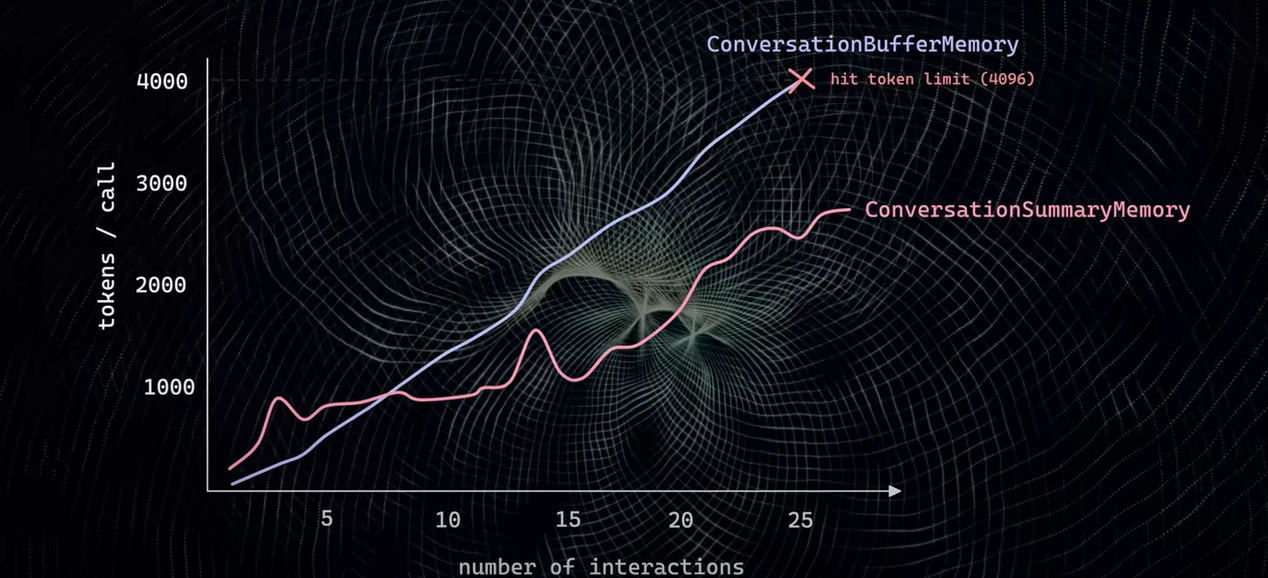

In [33]:
# initialize tokenizer
tokenizer = tiktoken.encoding_for_model('text-davinci-003')

# show number of tokens for the memory used by each memory type
print(
    f'Buffer memory conversation length: {len(tokenizer.encode(conversation_buf.memory.buffer))}\n'
    f'Summary memory conversation length: {len(tokenizer.encode(conversation_sum.memory.buffer))}'
)

Buffer memory conversation length: 318
Summary memory conversation length: 219


### ConversationBufferWindowMemory

In [34]:
conversation_bufw = ConversationChain(
    llm=llm, 
    memory=ConversationBufferWindowMemory(k=1)
)

In [35]:
count_tokens(
    conversation_bufw, 
    "Good morning AI!"
)

Spent a total of 85 tokens


" Good morning! It's a beautiful day today, isn't it? How can I help you?"

In [36]:
count_tokens(
    conversation_bufw, 
    "My interest here is to explore the potential of integrating Large Language Models with external knowledge"
)

Spent a total of 178 tokens


' Interesting! Large Language Models are a type of artificial intelligence that can process natural language and generate text. They can be used to generate text from a given context, or to answer questions about a given context. Integrating them with external knowledge can help them to better understand the context and generate more accurate results. Do you have any specific questions about this integration?'

In [37]:
count_tokens(
    conversation_bufw, 
    "I just want to analyze the different possibilities. What can you think of?"
)

Spent a total of 233 tokens


' There are many possibilities for integrating Large Language Models with external knowledge. For example, you could use external knowledge to provide additional context to the model, or to provide additional training data. You could also use external knowledge to help the model better understand the context of a given text, or to help it generate more accurate results.'

In [38]:
count_tokens(
    conversation_bufw, 
    "Which data source types could be used to give context to the model?"
)

Spent a total of 245 tokens


' Data sources that could be used to give context to the model include text corpora, structured databases, and ontologies. Text corpora provide a large amount of text data that can be used to train the model and provide additional context. Structured databases provide structured data that can be used to provide additional context to the model. Ontologies provide a structured representation of knowledge that can be used to provide additional context to the model.'

In [39]:
count_tokens(
    conversation_bufw, 
    "What is my aim again?"
)

Spent a total of 186 tokens


' Your aim is to use data sources to give context to the model.'

In [40]:
bufw_history = conversation_bufw.memory.load_memory_variables(
    inputs=[]
)['history']

In [41]:
print(bufw_history)

Human: What is my aim again?
AI:  Your aim is to use data sources to give context to the model.


In [42]:
print(
    f'Buffer memory conversation length: {len(tokenizer.encode(conversation_buf.memory.buffer))}\n'
    f'Summary memory conversation length: {len(tokenizer.encode(conversation_sum.memory.buffer))}\n'
    f'Buffer window memory conversation length: {len(tokenizer.encode(bufw_history))}'
)

Buffer memory conversation length: 318
Summary memory conversation length: 219
Buffer window memory conversation length: 26


![Screenshot 2023-12-05 172150.png](<attachment:Screenshot 2023-12-05 172150.png>)
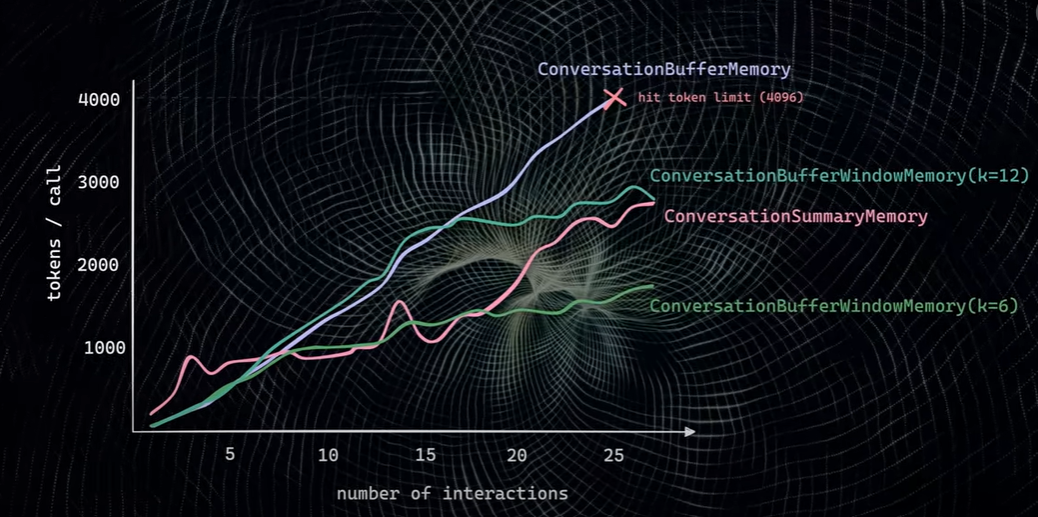

### ConversationSummaryBufferMemory

In [ ]:
conversation_sum_bufw = ConversationChain{
    llm = llm,
    memory = ConversationSummaryBufferMemory{
        llm = llm,
        max_token_limit = 650
    }
}

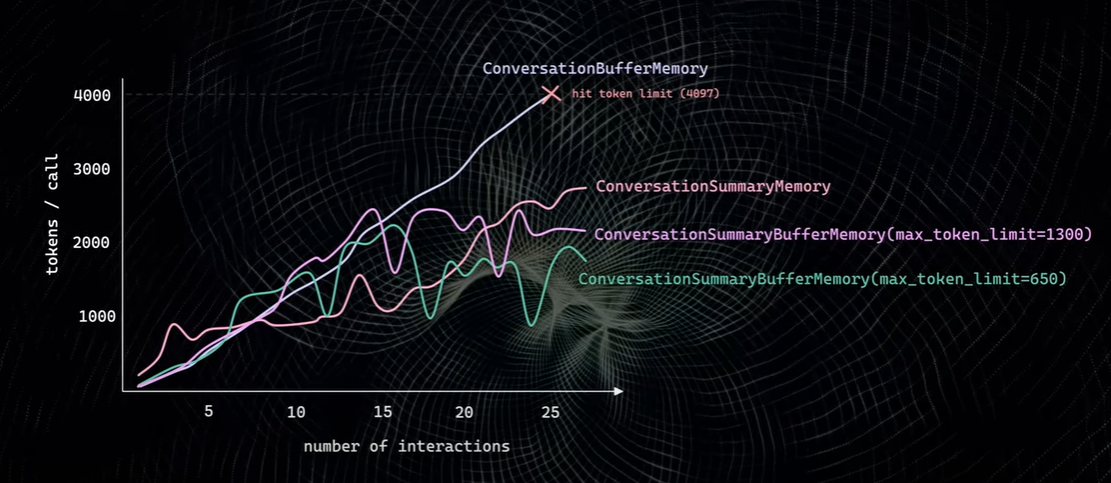

## **Agents**

In [6]:
from sqlalchemy import MetaData

metadata_obj = MetaData()

In [7]:
from sqlalchemy import Column, Integer, String, Table, Date, Float

stocks = Table(
    "stocks",
    metadata_obj,
    Column("obs_id", Integer, primary_key=True),
    Column("stock_ticker", String(4), nullable=False),
    Column("price", Float, nullable=False),
    Column("date", Date, nullable=False),
)

In [8]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///:memory:")
metadata_obj.create_all(engine)

In [9]:
from datetime import datetime

observations = [
    [1, 'ABC', 200, datetime(2023, 1, 1)],
    [2, 'ABC', 208, datetime(2023, 1, 2)],
    [3, 'ABC', 232, datetime(2023, 1, 3)],
    [4, 'ABC', 225, datetime(2023, 1, 4)],
    [5, 'ABC', 226, datetime(2023, 1, 5)],
    [6, 'XYZ', 810, datetime(2023, 1, 1)],
    [7, 'XYZ', 803, datetime(2023, 1, 2)],
    [8, 'XYZ', 798, datetime(2023, 1, 3)],
    [9, 'XYZ', 795, datetime(2023, 1, 4)],
    [10, 'XYZ', 791, datetime(2023, 1, 5)],
]

In [10]:
from sqlalchemy import insert

def insert_obs(obs):
    stmt = insert(stocks).values(
    obs_id=obs[0],
    stock_ticker=obs[1],
    price=obs[2],
    date=obs[3]
    )

    with engine.begin() as conn:
        conn.execute(stmt)

In [11]:
for obs in observations:
    insert_obs(obs)

In [1]:
!pip install langchain_experimental -qU

^C


In [12]:
from langchain.utilities import SQLDatabase
from langchain_experimental.sql import SQLDatabaseChain

db = SQLDatabase(engine)
sql_chain = SQLDatabaseChain(llm=llm, database=db, verbose=True)

c:\Users\udith\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_experimental\sql\base.py:75: UserWarning: Directly instantiating an SQLDatabaseChain with an llm is deprecated. Please instantiate with llm_chain argument or using the from_llm class method.
  warnings.warn(


In [13]:
from langchain.callbacks import get_openai_callback

def count_tokens(agent, query):
    with get_openai_callback() as cb:
        result = agent(query)
        print(f'Spent a total of {cb.total_tokens} tokens')

    return result

Using one of langchain's pre-built agents involves three variables:
* defining the tools or the toolkit
* defining the llm
* defining the agent type



There are Four Types of Agents
- Zero Shot React
- ConversationalReact
- ReactDocStore
- SelfAskWithSearch

### Agent type #1: Zero Shot React

In [14]:
from langchain.agents import create_sql_agent
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.agents.agent_types import AgentType

agent_executor = create_sql_agent(
    llm=llm,
    toolkit=SQLDatabaseToolkit(db=db, llm=llm),
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    max_iterations=3
)

In [21]:
result = count_tokens(
    agent_executor,
    "What are the stock prices for 'XYZ' in January 3rd and in January the 4th?"
)



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: 
Observation: stocks
Thought: I should query the schema of the stocks table to see what columns I can use.
Action: sql_db_schema
Action Input: stocks
Observation: 
CREATE TABLE stocks (
	obs_id INTEGER NOT NULL, 
	stock_ticker VARCHAR(4) NOT NULL, 
	price FLOAT NOT NULL, 
	date DATE NOT NULL, 
	PRIMARY KEY (obs_id)
)

/*
3 rows from stocks table:
obs_id	stock_ticker	price	date
1	ABC	200.0	2023-01-01
2	ABC	208.0	2023-01-02
3	ABC	232.0	2023-01-03
*/
Thought: I should query the stocks table for the stock prices of 'XYZ' on January 3rd and 4th.
Action: sql_db_query
Action Input: SELECT price, date FROM stocks WHERE stock_ticker = 'XYZ' AND date IN ('2023-01-03', '2023-01-04') ORDER BY date ASC LIMIT 10
Observation: [(798.0, '2023-01-03'), (795.0, '2023-01-04')]
Thought:

> Finished chain.
Spent a total of 2264 tokens


In [18]:
print(agent_executor.agent.llm_chain.prompt.template)

You are an agent designed to interact with a SQL database.
Given an input question, create a syntactically correct sqlite query to run, then look at the results of the query and return the answer.
Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 10 results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.
You have access to tools for interacting with the database.
Only use the below tools. Only use the information returned by the below tools to construct your final answer.
You MUST double check your query before executing it. If you get an error while executing a query, rewrite the query and try again.

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database.

If the question does not seem related to the database, just return "I don't k

### Agent type #2: Conversational React

In [19]:
from langchain.agents import load_tools

tools = load_tools(
    ["llm-math"],
    llm=llm
)

In [20]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history")

In [21]:
from langchain.agents import initialize_agent

conversational_agent = initialize_agent(
    agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
    tools=tools,
    llm=llm,
    verbose=True,
    max_iterations=3,
    memory=memory,
)

In [22]:
result = count_tokens(
    conversational_agent,
    "What's the result of an investment of $10,000 growing at 8% annually for 5 years with compound interest?"
)



> Entering new AgentExecutor chain...

Thought: Do I need to use a tool? Yes
Action: Calculator
Action Input: 10,000, 8%, 5 years
Observation: Answer: 14693.280768000006
Thought: Do I need to use a tool? No
AI: The result of an investment of $10,000 growing at 8% annually for 5 years with compound interest is $14,693.28.

> Finished chain.
Spent a total of 1246 tokens


In [23]:
print(conversational_agent.agent.llm_chain.prompt.template)

Assistant is a large language model trained by OpenAI.

Assistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

Assistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide range of topics.

Overall, Assistant is a powerful tool that can help with a wide range of tasks 

### Agent type #3: React Docstore

In [26]:
from langchain import Wikipedia
from langchain.agents.react.base import DocstoreExplorer, Tool

docstore=DocstoreExplorer(Wikipedia())
tools = [
    Tool(
        name="Search",
        func=docstore.search,
        description='search wikipedia'
    ),
    Tool(
        name="Lookup",
        func=docstore.lookup,
        description='lookup a term in wikipedia'
    )
]

In [27]:
docstore_agent = initialize_agent(
    tools,
    llm,
    agent="react-docstore",
    verbose=True,
    max_iterations=3
)

In [28]:
count_tokens(docstore_agent, "What were Archimedes' last words?")



> Entering new AgentExecutor chain...
Thought: I need to search Archimedes and find his last words.
Action: Search[Archimedes]
Observation: Archimedes of Syracuse (, ARK-ihm-EE-deez; c. 287 – c. 212 BC) was an Ancient Greek mathematician, physicist, engineer, astronomer, and inventor from the ancient city of Syracuse in Sicily. Although few details of his life are known, he is regarded as one of the leading scientists in classical antiquity. Considered the greatest mathematician of ancient history, and one of the greatest of all time, Archimedes anticipated modern calculus and analysis by applying the concept of the infinitely small and the method of exhaustion to derive and rigorously prove a range of geometrical theorems. These include the area of a circle, the surface area and volume of a sphere, the area of an ellipse, the area under a parabola, the volume of a segment of a paraboloid of revolution, the volume of a segment of a hyperboloid of revolution, and the area of a spiral.

{'input': "What were Archimedes' last words?",
 'output': 'Do not disturb my circles'}

### Agent type #4: Self Ask with Search

In [29]:
from langchain import OpenAI, SerpAPIWrapper
from langchain.agents import initialize_agent, Tool

search = SerpAPIWrapper(serpapi_api_key='api_key')
tools = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description='google search'
    )
]

self_ask_with_search = initialize_agent(tools, llm, agent="self-ask-with-search", verbose=True)

In [30]:
print(self_ask_with_search.agent.llm_chain.prompt.template)

Question: Who lived longer, Muhammad Ali or Alan Turing?
Are follow up questions needed here: Yes.
Follow up: How old was Muhammad Ali when he died?
Intermediate answer: Muhammad Ali was 74 years old when he died.
Follow up: How old was Alan Turing when he died?
Intermediate answer: Alan Turing was 41 years old when he died.
So the final answer is: Muhammad Ali

Question: When was the founder of craigslist born?
Are follow up questions needed here: Yes.
Follow up: Who was the founder of craigslist?
Intermediate answer: Craigslist was founded by Craig Newmark.
Follow up: When was Craig Newmark born?
Intermediate answer: Craig Newmark was born on December 6, 1952.
So the final answer is: December 6, 1952

Question: Who was the maternal grandfather of George Washington?
Are follow up questions needed here: Yes.
Follow up: Who was the mother of George Washington?
Intermediate answer: The mother of George Washington was Mary Ball Washington.
Follow up: Who was the father of Mary Ball Washin